## Use User data perform SVM algorithm. 

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

/Users/Pooja/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('datasets/User_Data.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


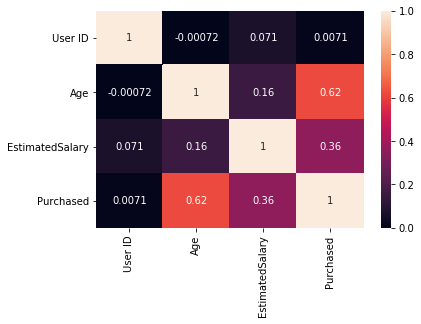

In [5]:
sns.heatmap(df.corr(),annot=True)

In [6]:
#mapping categorical feature into numerical 
df['Male'] = df['Gender'].map( {'Male':1, 'Female':0} )

In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [8]:
X= df.drop(['User ID','Purchased','Gender'],axis=1)

In [9]:
X.head()

,Age,EstimatedSalary,Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


In [10]:
y=df['Purchased'].values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
#scaling the dataset
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [15]:
from sklearn.svm import SVC

In [26]:
svc_model= SVC(kernel='rbf',probability=True)

In [27]:
svc_model.fit(X_train,y_train)

SVC(probability=True)

In [28]:
svc_pre=svc_model.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [30]:
print(classification_report(y_test,svc_pre))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.90      0.94      0.92        47

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



In [31]:
print(confusion_matrix(y_test,svc_pre))

[[68  5]
 [ 3 44]]


In [32]:
accuracy_score(y_test,svc_pre)

0.9333333333333333

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc,accuracy_score,confusion_matrix

### ROC_Curve

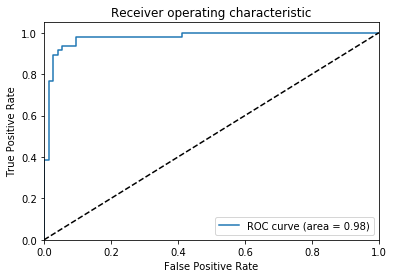

In [34]:
svc_pre=svc_model.predict(X_test)
y_pred = svc_model.predict_proba(X_test)[:,1]
fpr, tpr, th = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr) # compute area under the curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")